In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches


# Pfad zur Excel-Datei
dateipfad = r"C:/Users/ilyas/OneDrive/Desktop/cda2_versuch3000/Daten/Schlieren_20231019_Labels.xlsx"

In [37]:
# Excel-Datei einlesen
df = pd.read_excel(dateipfad)
df.head(1000)
(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8780 entries, 0 to 8779
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Frame           8780 non-null   int64  
 1   Objekt          8780 non-null   int64  
 2   Objekt ID       8780 non-null   int64  
 3   Objektlabel     8780 non-null   object 
 4   Konfidenz       8780 non-null   float64
 5   Trackingstatus  8780 non-null   object 
 6   x               8774 non-null   float64
 7   y               8774 non-null   float64
 8   z               8774 non-null   float64
 9   vx              8774 non-null   object 
 10  xy              8774 non-null   object 
 11  vz              8774 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 823.2+ KB


In [38]:
def tennisfeld(r, P1, P2, P3):
    r1 = P2 - P1
    r3 = P3 - 0.5 * (P1 + P2)
    # Streckung der Basisvektoren
    r1u = r1 / np.sqrt(np.dot(r1, r1)) * 0.92
    r3u = r3 / np.sqrt(np.dot(r3, r3)) * 0.828
    r2u = np.cross(r1u, r3u)
    # Translation
    T0 = P3
    # Rotation
    M1 = np.c_[r1u, r2u, r3u]
    M1_inv = np.linalg.inv(M1)
    # Abbildung
    return np.inner(M1_inv, (r - T0))

In [39]:
def drawTennisField():
    plt.plot([4.11, 4.11], [-11.89, 11.89], 'k', lw=2)  # Single sideline rechts
    plt.plot([5.48, 5.48], [-11.89, 11.89], 'k', lw=2)  # Double sideline rechts
    plt.plot([-4.11, -4.11], [-11.89, 11.89], 'k', lw=2)  # Single sideline links
    plt.plot([-5.48, -5.48], [-11.89, 11.89], 'k', lw=2)  # Double sideline links
    plt.plot([0, 0], [-6.40, 6.40], 'k', lw=2)  # Center Service Line
    plt.plot([-5.48, 5.48], [0, 0], 'k', lw=2)  # Net
    plt.plot([-5.48, 5.48], [11.89, 11.89], 'k', lw=2)  # Baseline oben
    plt.plot([-5.48, 5.48], [-11.89, -11.89], 'k', lw=2)  # Baseline unten
    plt.plot([-4.11, 4.11], [-6.40, -6.40], 'k', lw=2)  # Service Line unten
    plt.plot([-4.11, 4.11], [6.40, 6.40], 'k', lw=2)  # Service Line oben

In [40]:
def zonen(y):
    # y ist die Länge entlang der Seitenlinie
    abs_y = abs(y)
    if 6.4 > abs_y:  # Vom Netz bis zur Aufschlaglinie
        return "Sehr Offensiv"
    elif 9 > abs_y:  #Bis fast zur Grundlinie
        return "Offensiv"
    elif 12.1 > abs_y:  # Etwas hinter der Grundlinie
        return "Neutral"
    else:  # Deutlich hinter der Grundlinie
        return "Defensiv"

In [41]:
def position(x):
    # x ist die Länge entlang der Grundlinie
    def_grenze = 1.5
    if x > def_grenze:
        return "Rechts"
    elif x < -def_grenze:
        return "Links"
    else:
        return "Mitte"

In [42]:
def calculate_angle(row):
    dx = row['new_x_Player2'] - row['new_x_Player1']
    dz = row['new_z_Player2'] - row['new_z_Player1']
    angle = np.degrees(np.arctan2(dz, dx))
    return angle


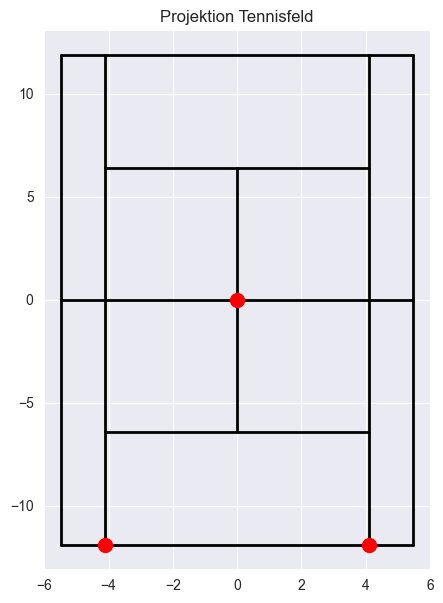

In [43]:
df.describe(include="all")
# Änder der Datentypen
df["Objekt ID"] = df["Objekt ID"].astype("category")
#Alle Head Koordinaten entfernen, da dies
#e keine Werte enthalten
df.drop(columns=["Objektlabel", "Trackingstatus"], axis=1, inplace=True)
plt.figure(figsize=(5, 7))
drawTennisField()
plt.plot([0], [0], color='r', marker='o', markersize=10)
plt.plot([-4.11], [-11.89], color='r', marker='o', markersize=10)
plt.plot([4.11], [-11.89], color='r', marker='o', markersize=10)
plt.title("Projektion Tennisfeld")
# Kooridnaten auf dem Tennisfeld als Kalibrierung
P1 = np.array([-4.207, -1.846, 5.733])  # Linke Ecke an der Grundlinie X Seitenlinie Einzelfeld
P2 = np.array([3.415, -1.870, 5.489])  # Rechte Ecke an der Grundlinie X Seitenlinie Einzelfeld
P3 = np.array([-0.057, -1.703, 15.554])  # Mittelpunkt am Netz
df["z"] = df["z"].apply(abs)
df[['new_x', 'new_y', 'new_z']] = df.apply(
    lambda row: pd.Series(tennisfeld(np.array([row['x'], row['y'], row['z']]), P1, P2, P3)), axis=1)


In [34]:
df_offset = df.copy()

In [14]:
df_offset.loc[df_offset["Objekt ID"] == "Player2", "new_z"] = df_offset.loc[
                                                                  df_offset["Objekt ID"] == "Player2", "new_z"] + 2

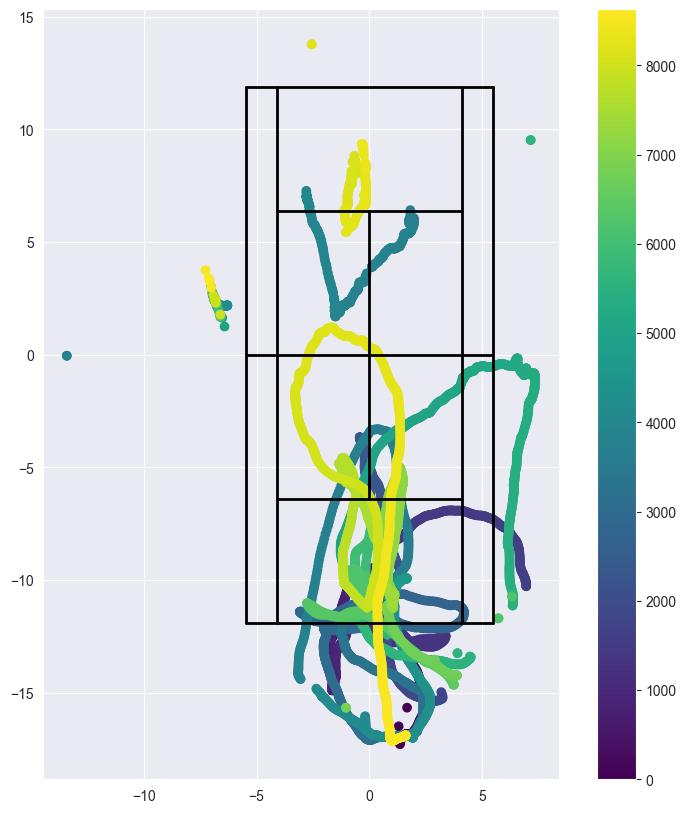

3709   -0.040421
3742   -0.040171
5153   -0.497377
5154   -0.494471
5155   -0.498864
          ...   
8253   -0.177889
8255   -0.229989
8257   -0.287391
8259   -0.356748
8261   -0.434331
Name: new_z, Length: 77, dtype: float64

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(x=df_offset['new_x'], y=df_offset['new_z'], c=df_offset['Frame'], cmap='viridis')
drawTennisField()
plt.colorbar()
ax.set_aspect('equal')
plt.show()
df.loc[(df["new_z"] < 0.5) & (df["new_z"] > -0.5)]["new_z"]

In [16]:
# Laden der Dateien: Tennisdaten-Excel-Datei und das Jupyter Notebook mit dem Code
# Ich starte mit der Analyse der Excel-Datei, um zu sehen, wie die Koordinatendaten strukturiert sind.
# Die Jupyter Notebook Datei kann nur als strukturierte Analyse betrachtet werden, ich werde daher zuerst
# die Excel-Daten laden.

# Excel-Datei einlesen
tennis_data = pd.read_excel(dateipfad)

# Überprüfung der ersten Zeilen, um einen Eindruck von der Datenstruktur zu bekommen
tennis_data.head()

,Frame,Objekt,Objekt ID,Objektlabel,Konfidenz,Trackingstatus,x,y,z,vx,xy,vz
0,0,0,0,Person,94.2383,OFF,1.050760,-0.120252,2.52079,-nan(ind),-nan(ind),-nan(ind)
1,1,0,0,Person,94.1895,OFF,0.683625,-0.192712,1.84814,25.6174,-0.0147605,-0.0061172
2,2,0,0,Person,94.4824,OFF,0.680010,-0.257117,1.46424,-4.72621,-2.75746,-15.6033
3,3,0,0,Person,94.8730,OK,0.720661,-0.282448,1.36528,-2.28864,-1.86874,-10.5725
4,4,0,0,Person,94.7754,OK,0.738426,-0.293895,1.29821,-1.54281,-1.41973,-8.01012


In [17]:
# Überprüfen der Wertebereiche von x, y und z
x_min, x_max = tennis_data['x'].min(), tennis_data['x'].max()
y_min, y_max = tennis_data['y'].min(), tennis_data['y'].max()
z_min, z_max = tennis_data['z'].min(), tennis_data['z'].max()

# Ausgabe der Wertebereiche für x, y und z
x_min, x_max, y_min, y_max, z_min, z_max

(np.float64(-12.3887),
 np.float64(6.81184),
 np.float64(-4.42354),
 np.float64(4.08422),
 np.float64(1.18803),
 np.float64(26.9443))

In [18]:
# Definition der realen Tennisfeld-Dimensionen (in Meter)
tennis_field_length = 23.77  # Länge
tennis_field_width = 8.23  # Breite für Einzel
max_z_height = 3.0  # Maximale Höhe für die Skalierung (angenommen 3 Meter)

# Skalierungsfaktoren berechnen basierend auf den Wertebereichen und Tennisfeld-Abmessungen
scale_x = tennis_field_length / (x_max - x_min)
scale_y = tennis_field_width / (y_max - y_min)
scale_z = max_z_height / (z_max - z_min)

# Anwendung der Skalierung und Verschiebung der Daten, um sie in die Mitte des Tennisfelds zu transformieren
tennis_data['x_transformed'] = (tennis_data['x'] - x_min) * scale_x - tennis_field_length / 2
tennis_data['y_transformed'] = (tennis_data['y'] - y_min) * scale_y - tennis_field_width / 2
tennis_data['z_transformed'] = (tennis_data['z'] - z_min) * scale_z

# Anzeige der transformierten Daten für die ersten paar Zeilen
tennis_data[['x_transformed', 'y_transformed', 'z_transformed']].head()

,x_transformed,y_transformed,z_transformed
0,4.752864,0.047795,0.155235
1,4.298356,-0.022299,0.076887
2,4.293880,-0.084602,0.032172
3,4.344206,-0.109106,0.020645
4,4.366198,-0.120179,0.012833


In [19]:
# Hier ist der überarbeitete Code, der die Transformation der Koordinaten direkt im Datensatz vornimmt.

def transform_coordinates(df):
    """
    Funktion zur Transformation der Koordinaten x, y, z, sodass sie mit den echten Tennisfeldmaßen übereinstimmen.
    :param df: DataFrame mit den Original-Koordinaten x, y, z.
    :return: DataFrame mit den transformierten Koordinaten x_transformed, y_transformed, z_transformed.
    """
    # Tennisfeld-Dimensionen (in Meter)
    tennis_field_length = 23.77  # Länge des Tennisfelds
    tennis_field_width = 8.23  # Breite des Tennisfelds für Einzel
    max_z_height = 3.0  # Maximale Höhe (z.B. für Sprunghöhe)

    # Wertebereiche für Skalierung berechnen
    x_min, x_max = df['x'].min(), df['x'].max()
    y_min, y_max = df['y'].min(), df['y'].max()
    z_min, z_max = df['z'].min(), df['z'].max()

    # Skalierungsfaktoren berechnen
    scale_x = tennis_field_length / (x_max - x_min)
    scale_y = tennis_field_width / (y_max - y_min)
    scale_z = max_z_height / (z_max - z_min)

    # Transformierte Koordinaten berechnen
    df['x_transformed'] = (df['x'] - x_min) * scale_x - tennis_field_length / 2
    df['y_transformed'] = (df['y'] - y_min) * scale_y - tennis_field_width / 2
    df['z_transformed'] = (df['z'] - z_min) * scale_z

    return df


# Anwendung der Transformationsfunktion auf den geladenen Tennis-Datensatz
transformed_tennis_data = transform_coordinates(tennis_data)

# Anzeige der ersten Zeilen mit transformierten Koordinaten
transformed_tennis_data[['x_transformed', 'y_transformed', 'z_transformed']].head()

,x_transformed,y_transformed,z_transformed
0,4.752864,0.047795,0.155235
1,4.298356,-0.022299,0.076887
2,4.293880,-0.084602,0.032172
3,4.344206,-0.109106,0.020645
4,4.366198,-0.120179,0.012833


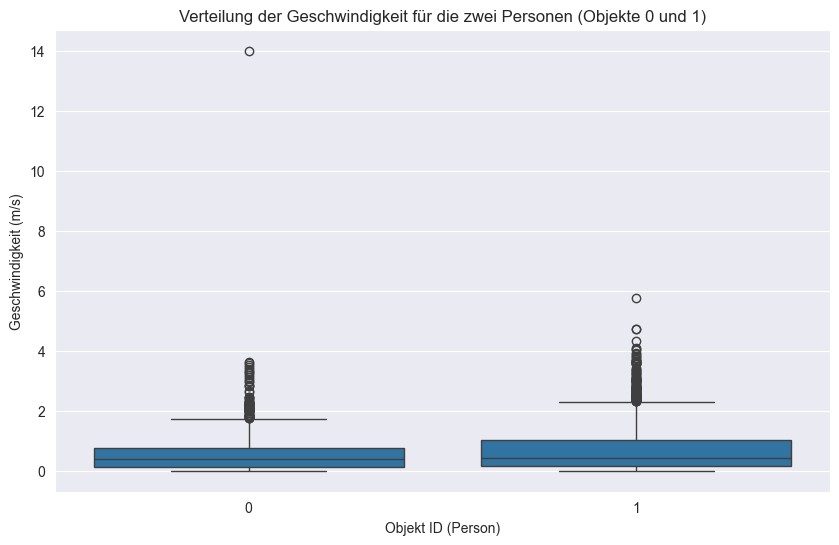

In [20]:
def calculate_speed(df, frame_rate):
    """
    Berechnet die Geschwindigkeit (m/s) basierend auf den x, y, z Koordinaten im Datensatz pro Frame.
    :param df: DataFrame mit den Spalten 'Objekt ID', 'Frame', 'x_transformed', 'y_transformed', 'z_transformed'
    :param frame_rate: Frame-Rate der Aufnahme (z.B. 30 für 30 FPS)
    :return: DataFrame mit zusätzlicher 'speed' Spalte pro Objekt
    """
    # Sortieren der Daten nach Objekt ID und Frame für korrekte Berechnungen
    df = df.sort_values(by=['Objekt ID', 'Frame'])

    # Berechnung der Zeitdifferenz zwischen Frames
    delta_t = 1 / frame_rate

    # Berechnung der Differenzen in x, y und z für jedes Objekt und jeden Frame
    df['delta_x'] = df.groupby('Objekt ID')['x_transformed'].diff()
    df['delta_y'] = df.groupby('Objekt ID')['y_transformed'].diff()
    df['delta_z'] = df.groupby('Objekt ID')['z_transformed'].diff()

    # Geschwindigkeit berechnen: v = √(dx² + dy² + dz²) / Δt
    df['speed'] = np.sqrt(df['delta_x'] ** 2 + df['delta_y'] ** 2 + df['delta_z'] ** 2) / delta_t

    # Entfernen der Hilfsspalten delta_x, delta_y und delta_z
    df.drop(['delta_x', 'delta_y', 'delta_z'], axis=1, inplace=True)

    return df


# Anwendung des Codes auf deinen DataFrame, zum Beispiel:
frame_rate = 30  # Frame-Rate in FPS
tennis_data = calculate_speed(tennis_data, frame_rate)

# Nur die Daten für die Objekte (Personen) 0 und 1 auswählen
tennis_data_filtered = tennis_data[tennis_data['Objekt ID'].isin([0, 1])]

# Boxplot für die Geschwindigkeiten der beiden Personen (Objekte 0 und 1) erstellen
plt.figure(figsize=(10, 6))
sns.boxplot(data=tennis_data_filtered, x='Objekt ID', y='speed')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Objekt ID (Person)")
plt.ylabel("Geschwindigkeit (m/s)")
plt.title("Verteilung der Geschwindigkeit für die zwei Personen (Objekte 0 und 1)")

# Anzeige des Boxplots
plt.show()

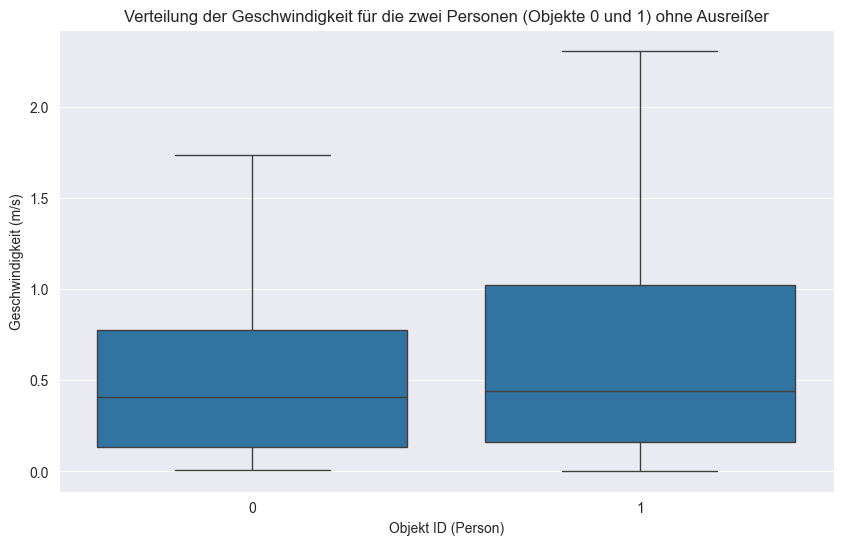

In [21]:
# Boxplot für die Geschwindigkeiten der beiden Personen (Objekte 0 und 1) ohne Ausreißer
plt.figure(figsize=(10, 6))
sns.boxplot(data=tennis_data_filtered, x='Objekt ID', y='speed', showfliers=False)

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Objekt ID (Person)")
plt.ylabel("Geschwindigkeit (m/s)")
plt.title("Verteilung der Geschwindigkeit für die zwei Personen (Objekte 0 und 1) ohne Ausreißer")

# Anzeige des Boxplots
plt.show()

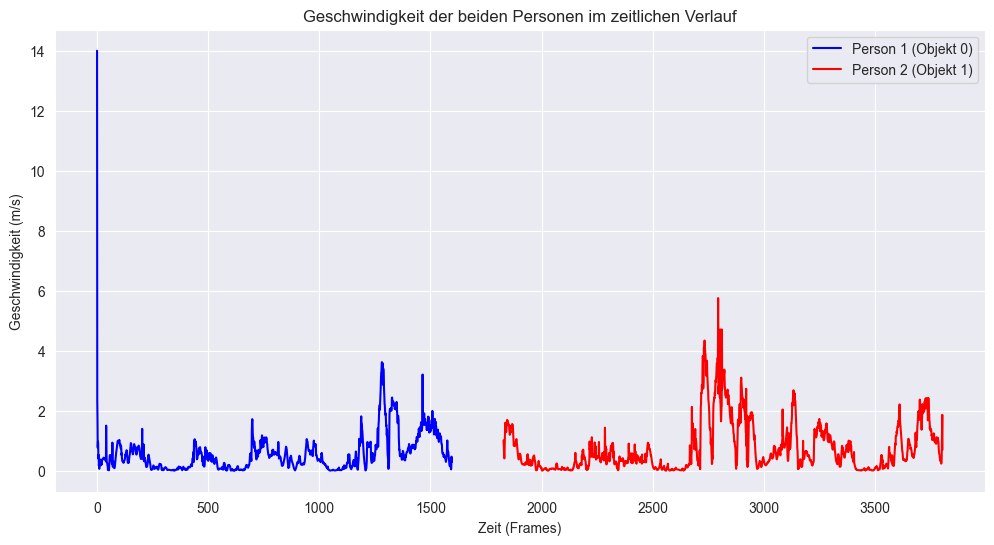

In [22]:
# Liniendiagramm der Geschwindigkeit beider Personen über die Zeit
plt.figure(figsize=(12, 6))

# Geschwindigkeit von Objekt 0 (Person 1) über die Zeit
plt.plot(tennis_data[tennis_data['Objekt ID'] == 0]['Frame'],
         tennis_data[tennis_data['Objekt ID'] == 0]['speed'],
         label='Person 1 (Objekt 0)', color='blue')

# Geschwindigkeit von Objekt 1 (Person 2) über die Zeit
plt.plot(tennis_data[tennis_data['Objekt ID'] == 1]['Frame'],
         tennis_data[tennis_data['Objekt ID'] == 1]['speed'],
         label='Person 2 (Objekt 1)', color='red')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel("Zeit (Frames)")
plt.ylabel("Geschwindigkeit (m/s)")
plt.title("Geschwindigkeit der beiden Personen im zeitlichen Verlauf")
plt.legend()

# Anzeige des Diagramms
plt.show()

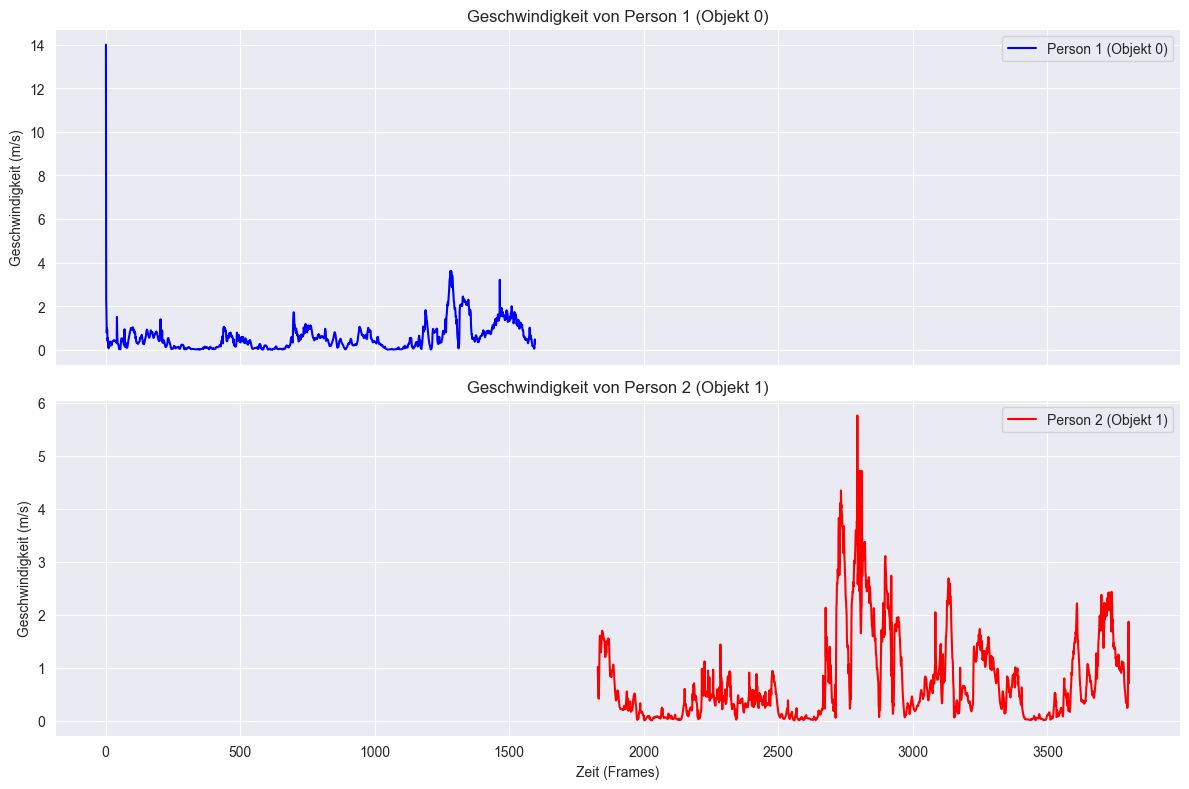

In [23]:
# Erstellen eines Figure-Objekts mit 2 Subplots (einer für jede Person)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Geschwindigkeit von Objekt 0 (Person 1) über die Zeit im ersten Subplot
ax1.plot(tennis_data[tennis_data['Objekt ID'] == 0]['Frame'],
         tennis_data[tennis_data['Objekt ID'] == 0]['speed'],
         color='blue', label='Person 1 (Objekt 0)')
ax1.set_ylabel("Geschwindigkeit (m/s)")
ax1.set_title("Geschwindigkeit von Person 1 (Objekt 0)")
ax1.legend()

# Geschwindigkeit von Objekt 1 (Person 2) über die Zeit im zweiten Subplot
ax2.plot(tennis_data[tennis_data['Objekt ID'] == 1]['Frame'],
         tennis_data[tennis_data['Objekt ID'] == 1]['speed'],
         color='red', label='Person 2 (Objekt 1)')
ax2.set_xlabel("Zeit (Frames)")
ax2.set_ylabel("Geschwindigkeit (m/s)")
ax2.set_title("Geschwindigkeit von Person 2 (Objekt 1)")
ax2.legend()

# Layout-Anpassungen
plt.tight_layout()
plt.show()

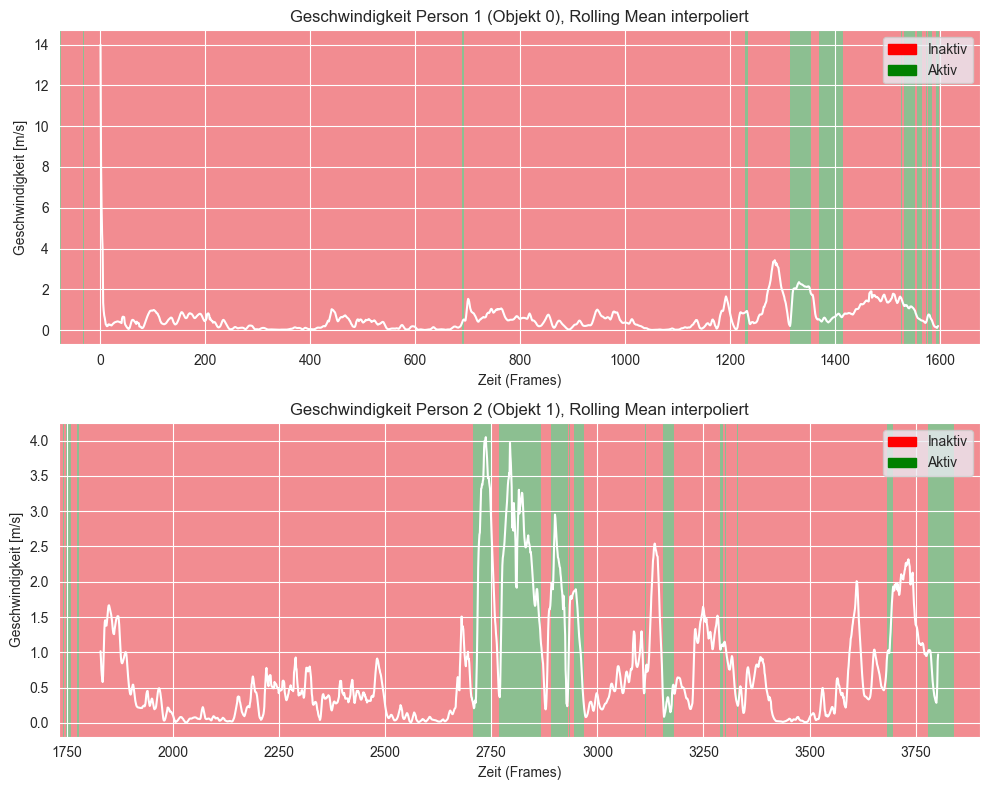

In [24]:
# Fenstergröße für den gleitenden Durchschnitt (z.B. 5 Frames)
window_size = 5


# Funktion zur Zuordnung des Aktivitätsstatus basierend auf der Geschwindigkeit
def assign_status(speed):
    """Funktion zur Zuordnung des Aktivitätsstatus basierend auf der Geschwindigkeit"""
    if speed < 1.5:
        return 'Inaktiv'
    else:
        return 'Aktiv'


# Berechnung der Status-Spalte für Person 1 (Objekt 0) basierend auf der Geschwindigkeit
person1_data = tennis_data[tennis_data['Objekt ID'] == 0].copy()
person1_data['Status'] = person1_data['speed'].apply(assign_status)

# Berechnung der Status-Spalte für Person 2 (Objekt 1) basierend auf der Geschwindigkeit
person2_data = tennis_data[tennis_data['Objekt ID'] == 1].copy()
person2_data['Status'] = person2_data['speed'].apply(assign_status)

# Berechnung des gleitenden Durchschnitts für Person 1 (Objekt 0)
person1_data['smoothed_speed'] = person1_data['speed'].rolling(window=window_size, min_periods=1).mean()

# Berechnung des gleitenden Durchschnitts für Person 2 (Objekt 1)
person2_data['smoothed_speed'] = person2_data['speed'].rolling(window=window_size, min_periods=1).mean()

# Erstelle eine benutzerdefinierte Farbkarte für den Status
cmap = ListedColormap(['red', 'green'])  # Rot für 'Inaktiv', Grün für 'Aktiv'

# Status-Spalte für die Farben (Inaktiv: rot, Aktiv: grün) auf Basis der tatsächlichen Geschwindigkeit
status_colors = {'Inaktiv': 0, 'Aktiv': 1}
person1_data['Status_color'] = person1_data['Status'].map(status_colors)
person2_data['Status_color'] = person2_data['Status'].map(status_colors)

# Benutzerdefinierte Patches für die Legende
inaktiv_patch = mpatches.Patch(color='red', label='Inaktiv')
aktiv_patch = mpatches.Patch(color='green', label='Aktiv')

# Erstellen von Subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot der geglätteten Geschwindigkeit für Person 1 im ersten Subplot
axs[0].plot(person1_data['Frame'], person1_data['smoothed_speed'], color='white')  # Weiße Linie für Person 1
axs[0].pcolorfast(axs[0].get_xlim(), axs[0].get_ylim(),
                  person1_data['Status_color'].values[np.newaxis],
                  cmap=cmap, alpha=0.4)
axs[0].legend(handles=[inaktiv_patch, aktiv_patch])
axs[0].set_title('Geschwindigkeit Person 1 (Objekt 0), Rolling Mean interpoliert')
axs[0].set_xlabel('Zeit (Frames)')
axs[0].set_ylabel('Geschwindigkeit [m/s]')

# Plot der geglätteten Geschwindigkeit für Person 2 im zweiten Subplot
axs[1].plot(person2_data['Frame'], person2_data['smoothed_speed'], color='white')  # Weiße Linie für Person 2
axs[1].pcolorfast(axs[1].get_xlim(), axs[1].get_ylim(),
                  person2_data['Status_color'].values[np.newaxis],
                  cmap=cmap, alpha=0.4)
axs[1].legend(handles=[inaktiv_patch, aktiv_patch])
axs[1].set_title('Geschwindigkeit Person 2 (Objekt 1), Rolling Mean interpoliert')
axs[1].set_xlabel('Zeit (Frames)')
axs[1].set_ylabel('Geschwindigkeit [m/s]')

# Anpassung des Layouts für eine bessere Darstellung
plt.tight_layout()

# Anzeigen der Diagramme
plt.show()